In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
%pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
df = pd.read_csv('../../Dataset/cleaned_used_cars.csv')

In [49]:
df.shape

(10631, 21)

In [67]:
dummies = pd.get_dummies(df.drop(['dateCrawled','lastSeen','dateCreated','name'], axis=1), columns=['seller', 'offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage'])
df_preprocessed = pd.concat([df.drop(['price','index','dateCrawled','lastSeen','yearOfRegistration','monthOfRegistration','nrOfPictures','postalCode',
             'name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], axis=1),
                             dummies], axis=1)

In [68]:
df_preprocessed

,powerPS,kilometer,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,50,40000,7,0,1980,50,40000,7,0,19348,...,0,0,0,0,0,0,1,0,1,0
1,118,150000,24,500,1990,118,150000,10,0,35390,...,0,0,0,0,0,0,0,0,0,1
2,129,150000,38,11900,2002,129,150000,11,0,10551,...,0,0,0,0,0,0,1,0,1,0
3,75,150000,211,999,1995,75,150000,10,0,76597,...,0,0,0,0,0,0,1,0,1,0
4,170,150000,337,11700,2008,170,150000,7,0,91717,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,163,150000,371070,999,1997,163,150000,8,0,22159,...,0,0,0,0,0,0,0,0,1,0
10627,68,80000,371126,3250,2010,68,80000,6,0,31228,...,0,0,0,0,0,0,0,0,0,1
10628,68,60000,371153,4900,2011,68,60000,3,0,30629,...,0,0,0,0,1,0,0,0,1,0
10629,116,150000,371256,6499,1996,116,150000,12,0,83064,...,0,0,0,0,0,0,0,0,1,0


In [69]:
X = df_preprocessed.astype(float).to_numpy()
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000)

score = model.evaluate(X_test, y_test)
print(f'Deep Learning Regression Mean Absolute Error: {score[1]:.2f}')

Epoch 1/1000
213/213 [==============================] - 1s 3ms/step - loss: 80841560.0000 - mae: 3394.2573 - val_loss: 32791740.0000 - val_mae: 1451.4382
Epoch 2/1000
213/213 [==============================] - 0s 2ms/step - loss: 9825698.0000 - mae: 888.0854 - val_loss: 2554964.2500 - val_mae: 812.0546
Epoch 3/1000
213/213 [==============================] - 0s 2ms/step - loss: 1793222.1250 - mae: 606.1443 - val_loss: 539429.1250 - val_mae: 446.0161
Epoch 4/1000
213/213 [==============================] - 0s 2ms/step - loss: 616964.8750 - mae: 425.9226 - val_loss: 614297.7500 - val_mae: 446.3794
Epoch 5/1000
213/213 [==============================] - 0s 2ms/step - loss: 723254.4375 - mae: 510.6482 - val_loss: 271191.3125 - val_mae: 288.4230
Epoch 6/1000
213/213 [==============================] - 0s 2ms/step - loss: 291997.2500 - mae: 348.8319 - val_loss: 154615.8750 - val_mae: 243.1874
Epoch 7/1000
213/213 [==============================] - 0s 2ms/step - loss: 194796.4062 - mae: 316.3749

In [70]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                4416      
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dense_85 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,041
Trainable params: 7,041
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.get_weights()

[array([[ 2.0983526e-01,  4.9721412e-02,  4.1138661e-01, ...,
          1.3511187e-01,  1.4787376e-01, -2.4346986e-01],
        [ 8.8300824e-02,  6.5699220e-02,  4.6594278e-03, ...,
         -1.8079849e-01,  1.3730215e-03, -3.6577210e-01],
        [-2.4064571e-02,  7.0058759e-03, -1.3938841e-01, ...,
         -1.8297136e-02,  5.0780758e-02, -2.1305455e-01],
        ...,
        [ 3.0343980e-02,  6.4542973e-01, -3.9784199e-01, ...,
         -1.6426820e-01,  1.2840173e-01, -9.0594605e-02],
        [-1.3140127e-01,  2.2480147e-01,  4.2769870e-01, ...,
          9.1037333e-02,  3.9820513e-01, -1.5944488e-01],
        [-1.0719839e-01, -2.2231297e+00, -1.4085068e+00, ...,
          1.2512964e-01, -1.9423512e+00, -1.0102224e-01]], dtype=float32),
 array([ 0.        , -0.05331182,  0.02230938,  0.01085826, -0.0215445 ,
         0.        ,  0.        , -0.1864218 , -0.22204487,  0.17929398,
        -0.2080765 , -0.03454088, -0.16777267, -0.1491772 , -0.21659933,
        -0.0624189 , -0.0179027

In [72]:
predictions = model.predict(X_test)

# Print the predicted prices
print(predictions)

67/67 [==============================] - 0s 1ms/step
[[  985.5534]
 [13509.551 ]
 [ 3505.836 ]
 ...
 [ 3604.3496]
 [ 1993.4398]
 [ 4997.5386]]


In [73]:
y_test

2685      990
518     13500
1090     3500
1488      350
9233     8498
        ...  
2589      500
5503     8999
4209     3600
6814     1999
763      4990
Name: price, Length: 2127, dtype: int64

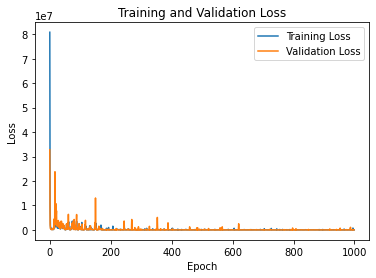

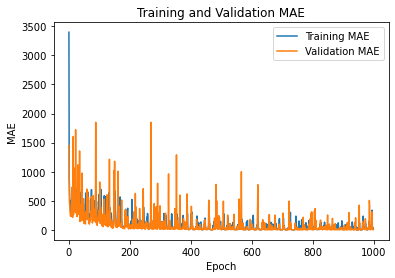

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()